# Set up and process metadata

In [116]:
import csv
import numpy as np
from dataclasses import dataclass
from sys import argv
import pandas as pd

@dataclass
class tax_result:
    species: str
    genus: str
    abund: float
    seq_abund: float

def read_sylph(file_path):
    df = pd.read_csv(file_path, sep='\t')
    df['Sample_file'] = df['Sample_file'].apply(lambda x: x.split('/')[-1].split('_1')[0])
    #df.set_index('Sample_file', inplace=True)
    return df


In [117]:
df_hum_all = read_sylph('real_profiles/human_sylph_results-big.tsv')
df_hum_refseq = read_sylph('real_profiles/human_sylph_results-refseq.tsv')
df_env_all = read_sylph('real_profiles/env_sylph_results-big.tsv')
df_env_refseq = read_sylph('real_profiles/env_sylph_results-refseq.tsv')

df_all = pd.concat([df_hum_all, df_env_all])
df_refseq = pd.concat([df_hum_refseq, df_env_refseq])

with open('real_profiles/oral_samples.txt', 'r') as f:
    oral_samples = f.read().splitlines()
with open('real_profiles/gut_samples.txt', 'r') as f:
    gut_samples = f.read().splitlines()    
with open('real_profiles/skin_samples.txt', 'r') as f:
    skin_samples = f.read().splitlines()
with open('real_profiles/water_sra.txt', 'r') as f:
    water_samples = f.read().splitlines()
with open('real_profiles/sediment_sra.txt', 'r') as f:
    sediment_samples = f.read().splitlines()
with open('real_profiles/sludge_sra.txt', 'r') as f:
    sludge_samples = f.read().splitlines()
with open('real_profiles/soil_sra.txt', 'r') as f:
    soil_samples = f.read().splitlines()
    
slens = {'Oral':len(oral_samples), 'Gut':len(gut_samples),
         'Skin': len(skin_samples), 'Sediment': len(sediment_samples),
        'Sludge': len(sludge_samples), 'Soil': len(soil_samples)}
    
df_all.loc[df_all['Sample_file'].isin(oral_samples), 'Label'] = 'Oral'
df_all.loc[df_all['Sample_file'].isin(gut_samples), 'Label'] = 'Gut'
df_all.loc[df_all['Sample_file'].isin(skin_samples), 'Label'] = 'Skin'
#df_all.loc[df_all['Sample_file'].isin(water_samples), 'Label'] = 'Terrestial'
df_all.loc[df_all['Sample_file'].isin(sediment_samples), 'Label'] = 'Terrestial'
df_all.loc[df_all['Sample_file'].isin(sludge_samples), 'Label'] = 'Terrestial'
df_all.loc[df_all['Sample_file'].isin(soil_samples), 'Label'] = 'Terrestial'


In [118]:
df_refseq.loc[df_refseq['Sample_file'].isin(oral_samples), 'Label'] = 'Oral'
df_refseq.loc[df_refseq['Sample_file'].isin(gut_samples), 'Label'] = 'Gut'
df_refseq.loc[df_refseq['Sample_file'].isin(skin_samples), 'Label'] = 'Skin'
#df_refseq.loc[df_refseq['Sample_file'].isin(water_samples), 'Label'] = 'Terrestial'
df_refseq.loc[df_refseq['Sample_file'].isin(sediment_samples), 'Label'] = 'Terrestial'
df_refseq.loc[df_refseq['Sample_file'].isin(sludge_samples), 'Label'] = 'Terrestial'
df_refseq.loc[df_refseq['Sample_file'].isin(soil_samples), 'Label'] = 'Terrestial'


{'Gut': [248, 338, 193, 108, 433, 206, 94, 211, 148, 110, 369, 137, 339, 296, 133, 191, 362, 369, 295, 285], 'Oral': [68, 41, 16, 85, 61, 40, 74, 27, 96, 65, 91, 97, 76, 69, 102, 102, 81, 83, 83, 53], 'Skin': [16, 12, 11, 34, 24, 15, 3, 65, 98, 2, 33, 30, 11, 16, 10, 13, 5, 58, 15, 30, 10, 3, 45, 77, 16, 35, 54, 19, 7, 12], 'Terrestial': [230, 51, 243, 17, 18, 8, 37, 288, 35, 81, 75, 37, 1, 19, 153, 2, 2, 2, 5, 2, 15, 4, 2, 1, 206, 12, 163, 244, 125]} 0
{'Gut': [128, 152, 156, 83, 194, 139, 79, 163, 100, 75, 189, 95, 147, 116, 96, 138, 154, 158, 180, 166], 'Oral': [39, 26, 11, 49, 35, 23, 39, 18, 48, 40, 49, 53, 42, 37, 56, 57, 49, 48, 51, 27], 'Skin': [13, 8, 9, 33, 22, 13, 1, 57, 78, 2, 26, 29, 10, 14, 7, 12, 4, 47, 9, 28, 9, 1, 43, 65, 12, 31, 46, 15, 6, 9], 'Terrestial': [27, 7, 25, 4, 5, 1, 14, 5, 12, 8, 8, 11, 1, 9, 72, 1, 40, 9, 29, 135, 17, 0, 0, 0, 0, 0, 0, 0, 0]} 0
{'Gut': [501, 695, 523, 481, 1016, 645, 221, 550, 537, 342, 966, 470, 954, 643, 354, 547, 923, 767, 712, 806], '

<Figure size 432x288 with 0 Axes>

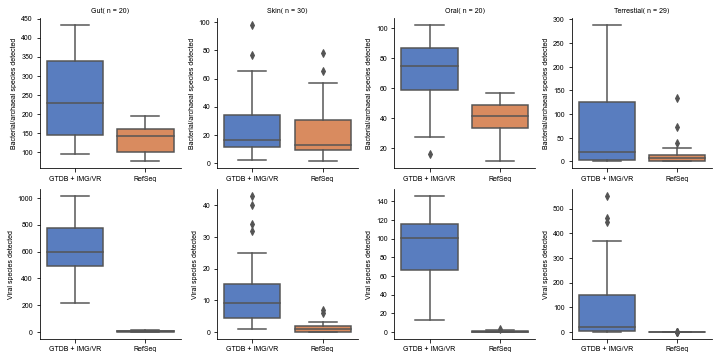

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = 1/2.54  # centimeters in inches\n",
cmap = sns.color_palette("muted")
plt.rcParams.update({'font.size': 7})
plt.rcParams.update({'figure.autolayout': True})
plt.rcParams.update({'font.family':'arial'})
plt.subplots_adjust(hspace=0.4)

# Define the test setups and metrics
titles = ['Gut', 'Skin', 'Oral', 'Terrestial']
fig, axes = plt.subplots(2, len(titles), figsize=(10, 5), sharey=False)


for j in range(2):
    if j == 0:
        df = df_all[df_all['Genome_file'].str.contains('gtdb')]
        df_r = pd.concat([
            df_refseq[df_refseq['Genome_file'].str.contains('bacteria')],
            df_refseq[df_refseq['Genome_file'].str.contains('archaea')]])

    else:
        df = df_all[df_all['Genome_file'].str.contains('IMG')]
        df_r = df_refseq[df_refseq['Genome_file'].str.contains('viral')]        
    # Create a dictionary to store arrays of sizes for each label
    boxplot_data = {}
    boxplot_data_r = {}
    
    grouped = df.groupby(['Label', 'Sample_file']).size().reset_index(name='Counts')
    grouped_r = df_r.groupby(['Label', 'Sample_file']).size().reset_index(name='Counts')
    
    for label, group in grouped.groupby('Label'):
        boxplot_data[label] = group['Counts'].tolist()
    for label, group in grouped_r.groupby('Label'):
        boxplot_data_r[label] = group['Counts'].tolist()
        

    for label, data in boxplot_data_r.items():
        for k in range(len(data),len(boxplot_data[label])):
            data.append(0)
    
    for label in boxplot_data.keys():
        if label not in boxplot_data_r:
            boxplot_data_r[label] = np.zeros(len(boxplot_data[label]))
    
    
    print(boxplot_data,j)
    print(boxplot_data_r,j)
    for (i, label) in enumerate(titles):
        ax = axes[j, i]
        #print(label)
        #print(boxplot_data[label])
        data = {"GTDB + IMG/VR" : boxplot_data[label], "RefSeq" : boxplot_data_r[label]}
            # Convert dictionary to DataFrame
        df = pd.DataFrame.from_dict(data, orient='index').transpose()
        if j == 0:
            y = "Bacterial/archaeal species detected"
        else:
            y = "Viral species detected"
        df_melted = df.melt(var_name='Category', value_name=y)
        # Create the boxplot with smaller width
        sns.boxplot(x = 'Category', y = y, data=df_melted, ax=ax, palette="muted", width=0.8)
        #ax.set_xticklabels(methods)
        #ax.set_ylabel(metric.capitalize())
        if j == 0:
            t = label + f"( n = {len(boxplot_data[label])})"
            ax.set_title(t, fontsize=7.0)    
        sns.despine(ax=ax)
        ax.set_xlabel('')

        #ax.tick_params(axis='x', rotation=75)
        
    # Add one title per row in the middle
    #fig.text(0.5, y_positions[i], setup, ha="center", va="center", fontsize=9)

# Show the grid of plots
plt.tight_layout()
#plt.savefig('figures/ani_r89_benchmark.svg')
plt.show()

/home/jimshawster/mambaforge/envs/taxprof/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jimshawster/mambaforge/envs/taxprof/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jimshawster/mambaforge/envs/taxprof/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jimshawster/mambaforge/envs/taxprof/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

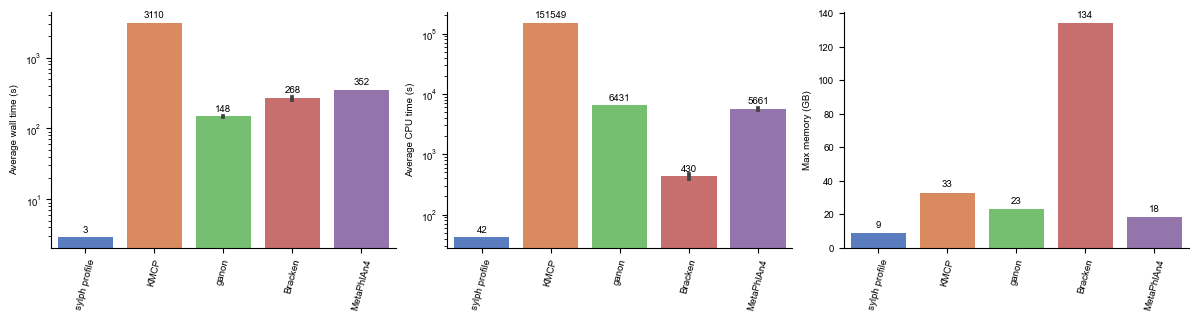

In [20]:
import csv
import numpy as np
from dataclasses import dataclass
from sys import argv

@dataclass
class tax_result:
    species: str
    genus: str
    abund: float
    seq_abund: float



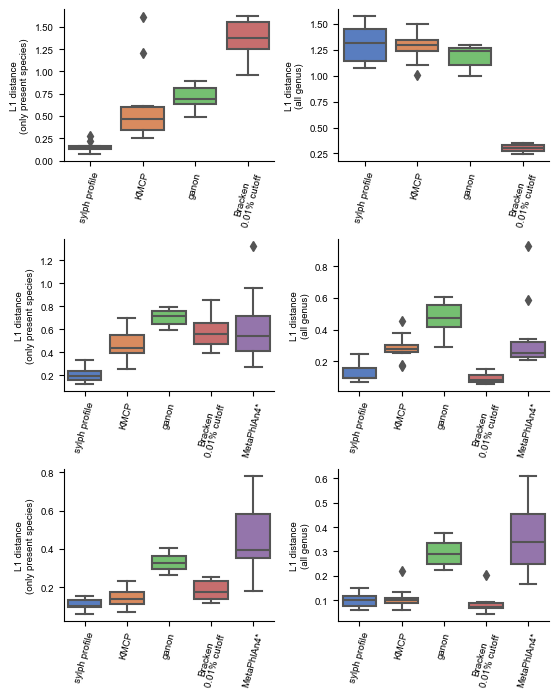

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plot aesthetics
plt.rcParams.update({'font.size': 7})
plt.rcParams.update({'figure.autolayout': True})
plt.rcParams.update({'font.family': 'arial'})

# Create the 1-row, 3-column subplot layout
fig, axes = plt.subplots(3, 2, figsize=(7 * 2/3 * 1.2, 7), sharey=False)
plt.subplots_adjust(hspace=0.4)

# Define the test setups
test_setups = ["95-97.5% ANI (50 genomes) + \n85-90% ANI (150 genomes; not present at species-level)", 
               "95-97.5% ANI (200 genomes)",
               "97.5-99.9% ANI (200 genomes)"]

#methods = ['sylph profile', 'KMCP', 'Bracken\n0.01% cutoff']

# Loop through the test setups to fill the grid
for i, setup in enumerate(test_setups):
    #for (j, eval) in enumerate(['l1', 'l1_constrain']):
    for (j, eval) in enumerate(['l1_constrain', 'l1genus']):
        if i == 0:
            methods = ['sylph profile', 'KMCP', 'ganon', 'Bracken\n0.01% cutoff']
            if j == 1:
                stats_l = [[sylph_stats_all,[],[]],
                           [kmcp_stats_all,[],[]], 
                           [ganon_stats_all,[],[]],
                           [kraken_stats_all,[],[]]]
            else:
                stats_l = [sylph_stats, kmcp_stats, ganon_stats, kraken_stats]
        else:
            methods = ['sylph profile', 'KMCP', 'ganon', 'Bracken\n0.01% cutoff', 'MetaPhlAn4*']
            stats_l = [sylph_stats, kmcp_stats, ganon_stats, kraken_stats, metaphlan_stats]
        ax = axes[i][j]
        
        # Extract the data for this subplot
        data_to_plot = []
        for k, method_stats in enumerate(stats_l):
            method_data = [x[eval] for x in method_stats[i]]
            data_to_plot.append(method_data)
        
        # Create the boxplot with smaller width
        sns.boxplot(data=data_to_plot, ax=ax, palette="muted", width=0.8)
        
        # Add labels
        # Two plots: species normalized L1, 
        # Holdout plot: species normalized L1, species true relative L1
        ax.set_xticklabels(methods)
        #if j == 0:
        #    ax.set_title(test_setups[i], fontsize=8.0)
        if j == 1:
            ax.set_ylabel('L1 distance\n(all genus)')
        if j == 0:
            ax.set_ylabel('L1 distance\n(only present species)')
    
        # Remove the top and right borders
        sns.despine(ax=ax)
        ax.tick_params(axis='x', rotation=75)
        
# Show the grid of plots
plt.tight_layout()
plt.savefig('figures/l1_metric_benchmark.svg')
plt.show()




/tmp/ipykernel_165080/887960619.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df,pd.DataFrame([{'Test Setup': setup, 'Method': method, 'Metric': metric, 'Value': value}])], ignore_index=True)
/home/jimshawster/mambaforge/envs/taxprof/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jimshawster/mambaforge/envs/taxprof/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types

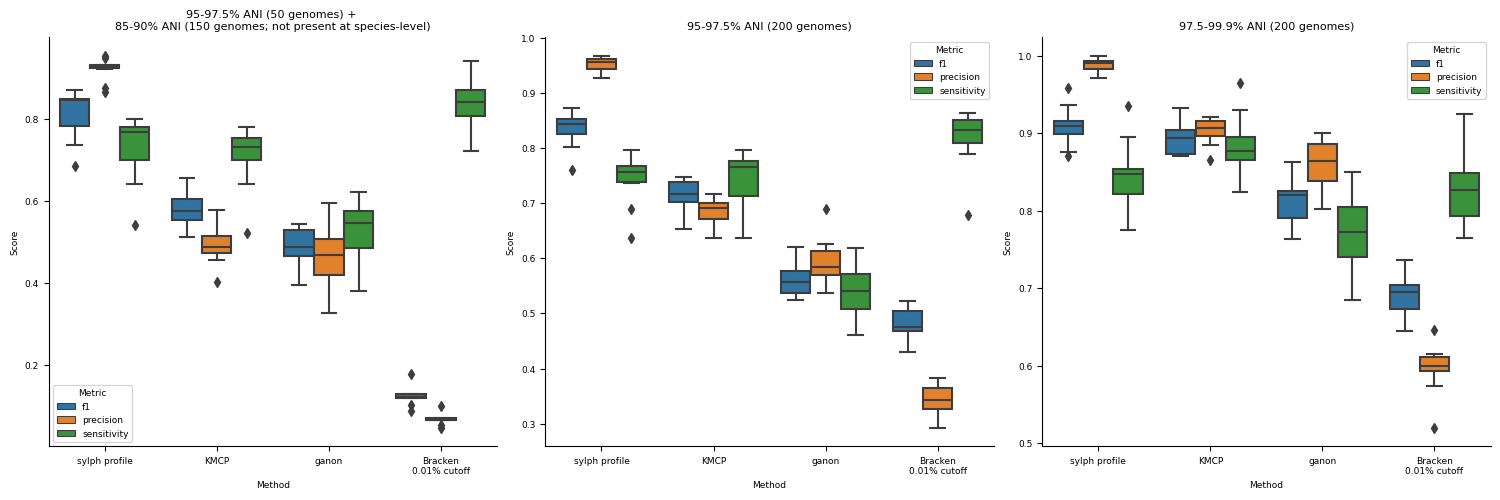

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Your configuration remains the same
cmap = sns.color_palette("muted")
plt.rcParams.update({'font.size': 7})
plt.rcParams.update({'figure.autolayout': True})
#plt.rcParams.update({'font.family':'arial'})

# Define the test setups and metrics
test_setups = ["95-97.5% ANI (50 genomes) + \n85-90% ANI (150 genomes; not present at species-level)", 
               "95-97.5% ANI (200 genomes)",
               "97.5-99.9% ANI (200 genomes)"]
metrics = ['f1', 'precision', 'sensitivity']
methods = ['sylph profile', 'KMCP', 'ganon', 'Bracken\n0.01% cutoff']

# Create an empty DataFrame
df = pd.DataFrame(columns=['Test Setup', 'Method', 'Metric', 'Value'])

# Populate the DataFrame
for i, setup in enumerate(test_setups):
    for method, method_stats in zip(methods, [sylph_stats, kmcp_stats, ganon_stats, kraken_stats]):
        for sample in method_stats[i]:
            for metric in metrics:
                value = sample[metric]
                df = pd.concat([df,pd.DataFrame([{'Test Setup': setup, 'Method': method, 'Metric': metric, 'Value': value}])], ignore_index=True)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, ax in enumerate(axes):
    sns.boxplot(x="Method", y="Value", hue="Metric", data=df[df['Test Setup'] == test_setups[i]], ax=ax)
    ax.set_title(test_setups[i], fontsize=8.0)
    ax.set_ylabel('Score')
    sns.despine(ax=ax)

plt.tight_layout()
plt.savefig('figures/ani_r89_benchmark_collapsed.svg')
plt.show()